# DSCI 6003 3.4 Lecture

## Evaluation Metrics


### By the End of this Lecture You Will:
1. Be able to describe the construction and usage of a confusion matrix
2. Construct and interpret a ROC curve plot.
3. Discuss the usage of information criteria in evaluating a model


## The Confusion Matrix

So far we have examined basic cross-validation procedures. Each of these procedures recieves an output performance metric for each run. However, there are a large number of 


![bias variance](images/bias_variance.png)

Note that both high bias or high variance are bad. Note that high variance is worse than it sounds since you will only be constructing the model once, so with high variance there's a low probability that your model will be near the optimal one.

Another way of viewing this is by comparing the error on the training set with the error on the test set. When you fit a model, it minimizes the error on the training set. An overfit model can reduce this to 0. However, what we really care about it how well it does on a new test set, since we want our model to perform well on unseen data. This paradigm is represented with the following graph.

![underfitting overfitting](images/underfitting_overfitting.png)


You can see on the left side of the graph that the data is *underfit*: both the train error and the test error are high. On the right hand side of the graph, the data is *overfit*: the train error is low but the test error is high. The best model is where the train error is lowest, around a degree 5 polynomial.




### Measuring Bias and Variance


### Accuracy
The simplest measure is **accuracy**. This is the number of correct predictions over the total number of predictions. It's the percent you predicted correctly. In `sklearn`, this is what the `score` method calculates.

### Shortcomings of Accuracy
Accuracy is often a good first glance measure, but it has many shortcomings. If the classes are unbalanced, accuracy will not measure how well you did at predicting. Say you are trying to predict whether or not an email is spam. Only 2% of emails are in fact spam emails. You could get 98% accuracy by always predicting not spam. This is a great accuracy but a horrible model!

### Confusion Matrix
We can get a better picture our model but looking at the confusion matrix. We get the following four metrics:

* **True Positives (TP)**: Correct positive predictions
* **False Positives (FP)**: Incorrect positive predictions (false alarm)
* **True Negatives (TN)**: Correct negative predictions
* **False Negatives (FN)**: Incorrect negative predictions (a miss)

|            | Predicted Yes  | Predicted No   |
| ---------- | -------------- | -------------- |
| Actual Yes | True positive  | False negative |
| Actual No  | False positive | True negative  |

With logistic regression, we can visualize this set of relationships as follows:

![logistic confusion matrix](images/logistic_2.png)

### Precision, Recall and F1

Instead of accuracy, there are some other scores we can calculate:

* **Precision**: A measure of how well the model reproduces putative positive predictions. This can be taken as an estimate of the bias.
    ```
    Precison = TP / (TP + FP)
             = TP / (predicted yes)
    ```
* **Recall**: A measure of how well you distinguish true positive cases from all possible positive cases. Sometimes called *sensitivity*. 

    ```
    Recall = TP / (TP + FN) 
           = (claimed yes) / (actual yes)
    ```
* **F1 Score**: The harmonic mean of Precision and Recall
    ```
    F1 = 2 / (1/Precision + 1/Recall)
       = 2 * Precision * Recall / (Precision + Recall)
       = 2TP / (2TP + FN + FP)
    ```

* Accuracy can be written in this notation:
    ```
    Accuracy = (TP + TN) / (TP + FP + TN + FN) = True Hits/(All Hits)
    ```

* Variance 

###QUIZ:
Why might we be interested in how well a model predicts negative cases? What are

## ROC Curves

Using the confusion matrix and all the values that we can calculate with it doesn't quite get at everything. With logistic regression, we are actually predicting probabilities, not just which class we think it belongs to. In the standard Logistic Regression, we put anything that has a probability of at least 0.5 in the positive class and everything else in the negative class. We could however choose any threshold from 0 to 1.

Each threshold corresponds to a different confusion matrix.

* Increasing the threshold will:
    - :grinning: decrease the number of False Positives,
    - :weary: decrease the number of True Positives,
    - :weary: increase the number of False Negatives, and
    - :grinning: increase the number of True Negatives.
    
Now we have an infinite number of models to compare! How are we going to investigate them?

We use the Receiver Operating Characteristic Curve, more commonly called the ROC Curve.

We calculate the False Positive Rate and the True Positive Rate for every posible threshold and graph them all!

Here's how we calculate the FPR and TPR:
```
TPR = TP / P 
    = TP / (TP + FN)
    = Recall

FPR = FP / N 
    = FP / (FP + TN)
```
Here's what the ROC Curve looks like:

![](images/roc_curve.png)



Note that our ideal is the upper left corner, where our FPR is 0 and our TPR is 1.

While this graph shows us what FPR and TPR we can get, it does not tell us the theshold that yeilds a specific FPR and TPR. However, once we figure out what point on the graph we want, we can figure out the appropriate threshold (it's just not shown to us on the ROC curve).


## Information Criterion Metrics (Model selection: typically regressions)

We have already discussed the use of entropy to estimate the amount of useful information present in a specific distribution of data (specifically the information_gain criterion). A great deal of research has gone into the quantification of useful information present in a distribution. Likewise, much research has gone into quantifying the amount of useful information captured by a single model. 

In order to use these metrics, a complete closed description of the "loss" function has to be available and implemented. Scikit only has one native implementation of automated IC model selection, however, the technique is quite common and well used in research.


### AIC and AIC corrected (AICc)

AIC is founded in information theory. It supposes that the data is generated by some unknown process (distribution free) f. We consider two candidate models to represent f: g1 and g2. If we knew f, then we could find the information lost from using g1 to represent f by calculating the degree to which the two distributions (f and g1) match using information theory; similarly, the information lost from using g2 to represent f can be found similarly. We then choose the candidate model that minimizes the loss of information .

$$ AIC = 2k - 2\ ln{(L)} $$

Where L is the final "loss" (cost) function value for the model's optimized set of parameters. For finite sample sizes, we must correct for the effect of the limits of sampling.

$$ AICc = AIC + \dfrac{2k(k+1)}{(n-k-1)} $$

([from wikipedia](https://en.wikipedia.org/wiki/Akaike_information_criterion))
To apply AIC in practice, we start with a set of candidate models, and then find the models' corresponding AIC values. There will almost always be information lost due to using a candidate model to represent the "true" model (i.e. the process that generates the data). 

We wish to select, from among the candidate models, the model that minimizes the information loss. We cannot choose with certainty, but we can minimize the estimated information loss.

Suppose that there are M candidate models. Denote the AIC values of those models by $AIC_{1}, AIC_{2}, AIC_{3}, \cdots, AIC_{M}$. Let $AIC_{min}$ be the minimum of those values. Then $P_{i}(AIC) = exp^{{\frac{AIC_{min} − AIC_{i}}{2}}}$ can be interpreted as the relative probability that the ith model minimizes the (estimated) information loss

## BIC

BIC can be derived from AIC, although it comes from a slightly different theoretical origin than AIC. It suffers from sample bias just as AIC (not AICc) does. 

The BIC generally penalizes free parameters more strongly than the Akaike information criterion, though it depends on the size of n and relative magnitude of n and k.

It is important to keep in mind that the BIC can be used to compare estimated models only when the numerical values of the dependent variable are identical for all estimates being compared.

BIC is given as:

$$ BIC = -2 ln{(L)} + k\ ln{(n)} $$


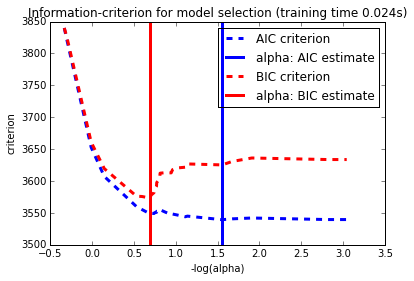

In [1]:
%matplotlib inline
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

X /= np.sqrt(np.sum(X ** 2, axis=0))

##############################################################################
### LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_

def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_[:-1]), criterion_[:-1], '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)